In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [47]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 7 clustering/crime_data.csv")

In [48]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
data.shape

(50, 5)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


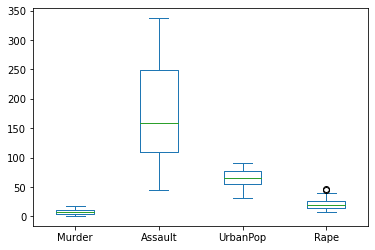

In [51]:
data.plot(kind="box")
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data_df = scaler.fit_transform(data.iloc[:,1:])

In [53]:
scaled_data_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [54]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=0)

In [55]:
kmeans.inertia_

57.55425863091106

In [56]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [57]:
wcss

[200.0,
 104.96163315756873,
 80.08886132199619,
 57.55425863091106,
 50.520265525350695,
 43.92746404497574,
 40.52183461131975,
 34.687388397849084,
 32.70648136388185,
 28.311639397122555]

In [58]:
clusters_new = KMeans(4, random_state=30)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=4, random_state=30)

In [59]:
clusters_new.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [60]:
data['clusterid_new'] = clusters_new.labels_

In [61]:
clusters_new.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [62]:
data.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,13.937500,243.625000,53.750000,21.412500
1,1,5.656250,138.875000,73.875000,18.781250
2,2,3.600000,78.538462,52.076923,12.176923
3,3,10.815385,257.384615,76.000000,33.192308


In [63]:
data.groupby('clusterid_new').mean()

,Murder,Assault,UrbanPop,Rape
clusterid_new,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308


In [64]:
data

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [65]:
data.sort_values('clusterid_new')

,State,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
9,Georgia,17.4,211,60,25.8,0
39,South Carolina,14.4,279,48,22.5,0
17,Louisiana,15.4,249,66,22.2,0
3,Arkansas,8.8,190,50,19.5,0
41,Tennessee,13.2,188,59,26.9,0
43,Utah,3.2,120,80,22.9,1
38,Rhode Island,3.4,174,87,8.3,1


In [66]:
data['clusterid_new'].value_counts()

1    16
3    13
2    13
0     8
Name: clusterid_new, dtype: int64